# SURPRISE HOUSING - ADVANCED REGRESSION ANALYSIS

<b> SREENATH S</b>

<H2>BUSINESS UNDERSTANDING:</H2>

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. The company needs a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

 
<H2>BUSINESS GOAL:</H2>

 
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error
import datetime

import warnings # supress warnings
warnings.filterwarnings('ignore')

<h2> DATA CLEANING AND PREPERATION </h2> 

Let us read the data, assumes that the file is in the same folder

In [130]:
housing_df = pd.read_csv("train.csv")

In [131]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [132]:
housing_df.shape

(1460, 81)

In [133]:
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


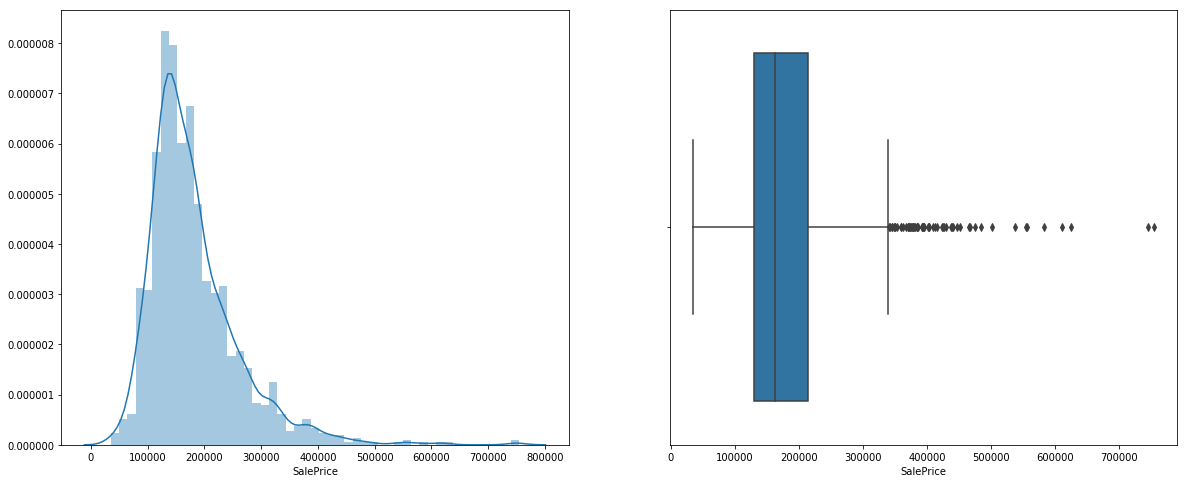

In [134]:
plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)
sns.distplot(housing_df.SalePrice)
plt.subplot(1, 2, 2)
sns.boxplot(housing_df.SalePrice)

It is clear from the plot that depenedent variable is having outliers and is right skewed. It wont be wise to remove the outliers unless it is sure that data entry issues.

Let's print columns with missing values in %ge

In [135]:
nullvalues = (housing_df.isnull().sum()/len(housing_df))*100
nullvalues[nullvalues != 0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

<H4>IMPUTING MISSING VALUES</H4>

As per data dictionary we can impute Masonry veneer type missing value to "No" and corresponding area with 0

In [136]:
housing_df.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [137]:
housing_df.MasVnrType.fillna('No', inplace = True)
housing_df.MasVnrArea.fillna(0, inplace = True)

For the attributes BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 it is mentioned in the data dictionary. So we will impote these attributes with "NoBasement"

In [138]:
for column in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    housing_df[column].fillna('No',inplace=True)

Now let us look at Alley, as per the data dictionary(meta data) Alley attribute can take up anyof the following values:
Grvl, Pave, NA. Hence we will replace NA with "No"

In [139]:
housing_df.Alley.unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [140]:
housing_df.Alley.fillna('No', inplace = True)

Let us impute value for attribute Electrical

In [141]:
housing_df[housing_df.Electrical.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,No,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


Only one row has missing value since its a categorical variable let us impute the data with mode

In [142]:
housing_df.Electrical.mode()[0]

'SBrkr'

In [143]:
housing_df.Electrical.fillna( housing_df.Electrical.mode()[0], inplace = True)

Now lets look at FireplaceQu

In [144]:
housing_df.FireplaceQu.unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [145]:
housing_df[housing_df.FireplaceQu.isnull()]['Fireplaces'].unique()

array([0], dtype=int64)

It is clear that the nan values correponds to the houses those doesnt have a fire place. So lets impute it with "No"

In [146]:
housing_df.FireplaceQu.fillna("No", inplace = True)

Lets impute the GarageType, GarageFinish, GarageQual, GarageCond with "No"

In [147]:
for column in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    housing_df[column].fillna('No',inplace=True)

Will impute GarageYrBlt with -1 to indicate those properties doesnt have garage. So it wont interfere wih any other class

In [148]:
housing_df.GarageYrBlt.fillna(-1,inplace=True)

Impute the PoolQC column with No

In [149]:
housing_df.PoolQC.fillna("No", inplace = True)

Now will look into attribute "Fence". The missing values are because of the fact that properties dioesnt have a fence. Let's impute with No

In [150]:
housing_df.Fence.fillna("No", inplace = True)

MiscFeature: The properties not having any extra features marked as NA hence will impute the column with No

In [151]:
housing_df.MiscFeature.fillna("No", inplace = True)

Let's see lot frontage its distribution and how its correlated to sales price

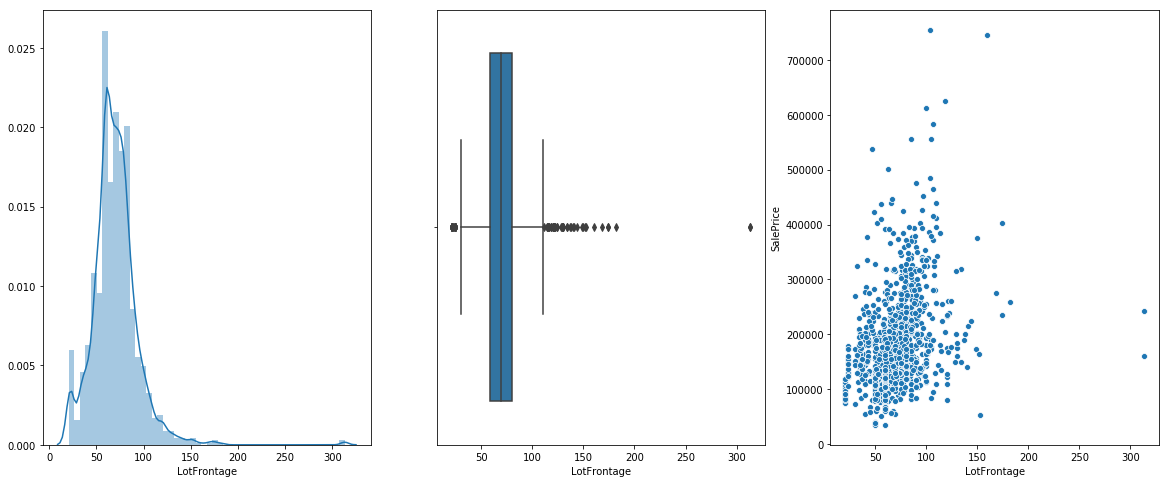

In [152]:
plt.figure(figsize = (20, 8))
plt.subplot(1, 3, 1)
sns.distplot(housing_df.LotFrontage[~housing_df.LotFrontage.isnull()])
plt.subplot(1, 3, 2)
sns.boxplot(housing_df.LotFrontage[~housing_df.LotFrontage.isnull()])
plt.subplot(1, 3, 3)
sns.scatterplot(housing_df.LotFrontage[~housing_df.LotFrontage.isnull()], housing_df.SalePrice)

In [153]:
housing_df[~housing_df.LotFrontage.isnull()][['LotFrontage','SalePrice']].corr()

,LotFrontage,SalePrice
LotFrontage,1.000000,0.351799
SalePrice,0.351799,1.000000


We can see there is a moderate correlation between the sales price and LotFrontage. Also from above plots we can see it has got some outliers. Hence we will impute missing value with median.

In [154]:
housing_df.LotFrontage.median()

69.0

In [155]:
housing_df.LotFrontage.fillna(housing_df.LotFrontage.median(), inplace = True)

<h4>DERIVED FEATURES</h4>

Lets convert the Year column to corresponding Age: compared to current Year:
Following are the year based columns:  YearBuilt, YearRemodAdd, GarageYrBlt, YrSold 

In [156]:
#We will compute age as of Jan 2020
housing_df['YearBuilt_Age'] =   2020 - housing_df.YearBuilt 
housing_df['YearRemodAdd_Age'] =  2020 - housing_df.YearRemodAdd 
housing_df['GarageYrBlt_Age'] =  2020 - housing_df.GarageYrBlt
housing_df['YrSold_Age'] = (2020 - housing_df.YrSold) + (round(((12 - housing_df.MoSold)/12), 2))

In [157]:
housing_df[['YearBuilt_Age', 'YearRemodAdd_Age', 'GarageYrBlt_Age', 'YrSold_Age']].head()

,YearBuilt_Age,YearRemodAdd_Age,GarageYrBlt_Age,YrSold_Age
0,17,17,17.0,12.83
1,44,44,44.0,13.58
2,19,18,19.0,12.25
3,105,50,22.0,14.83
4,20,20,20.0,12.00


In [158]:
housing_df = housing_df.drop(columns = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MoSold', 'Id'])

In [159]:
housing_df.shape

(1460, 79)

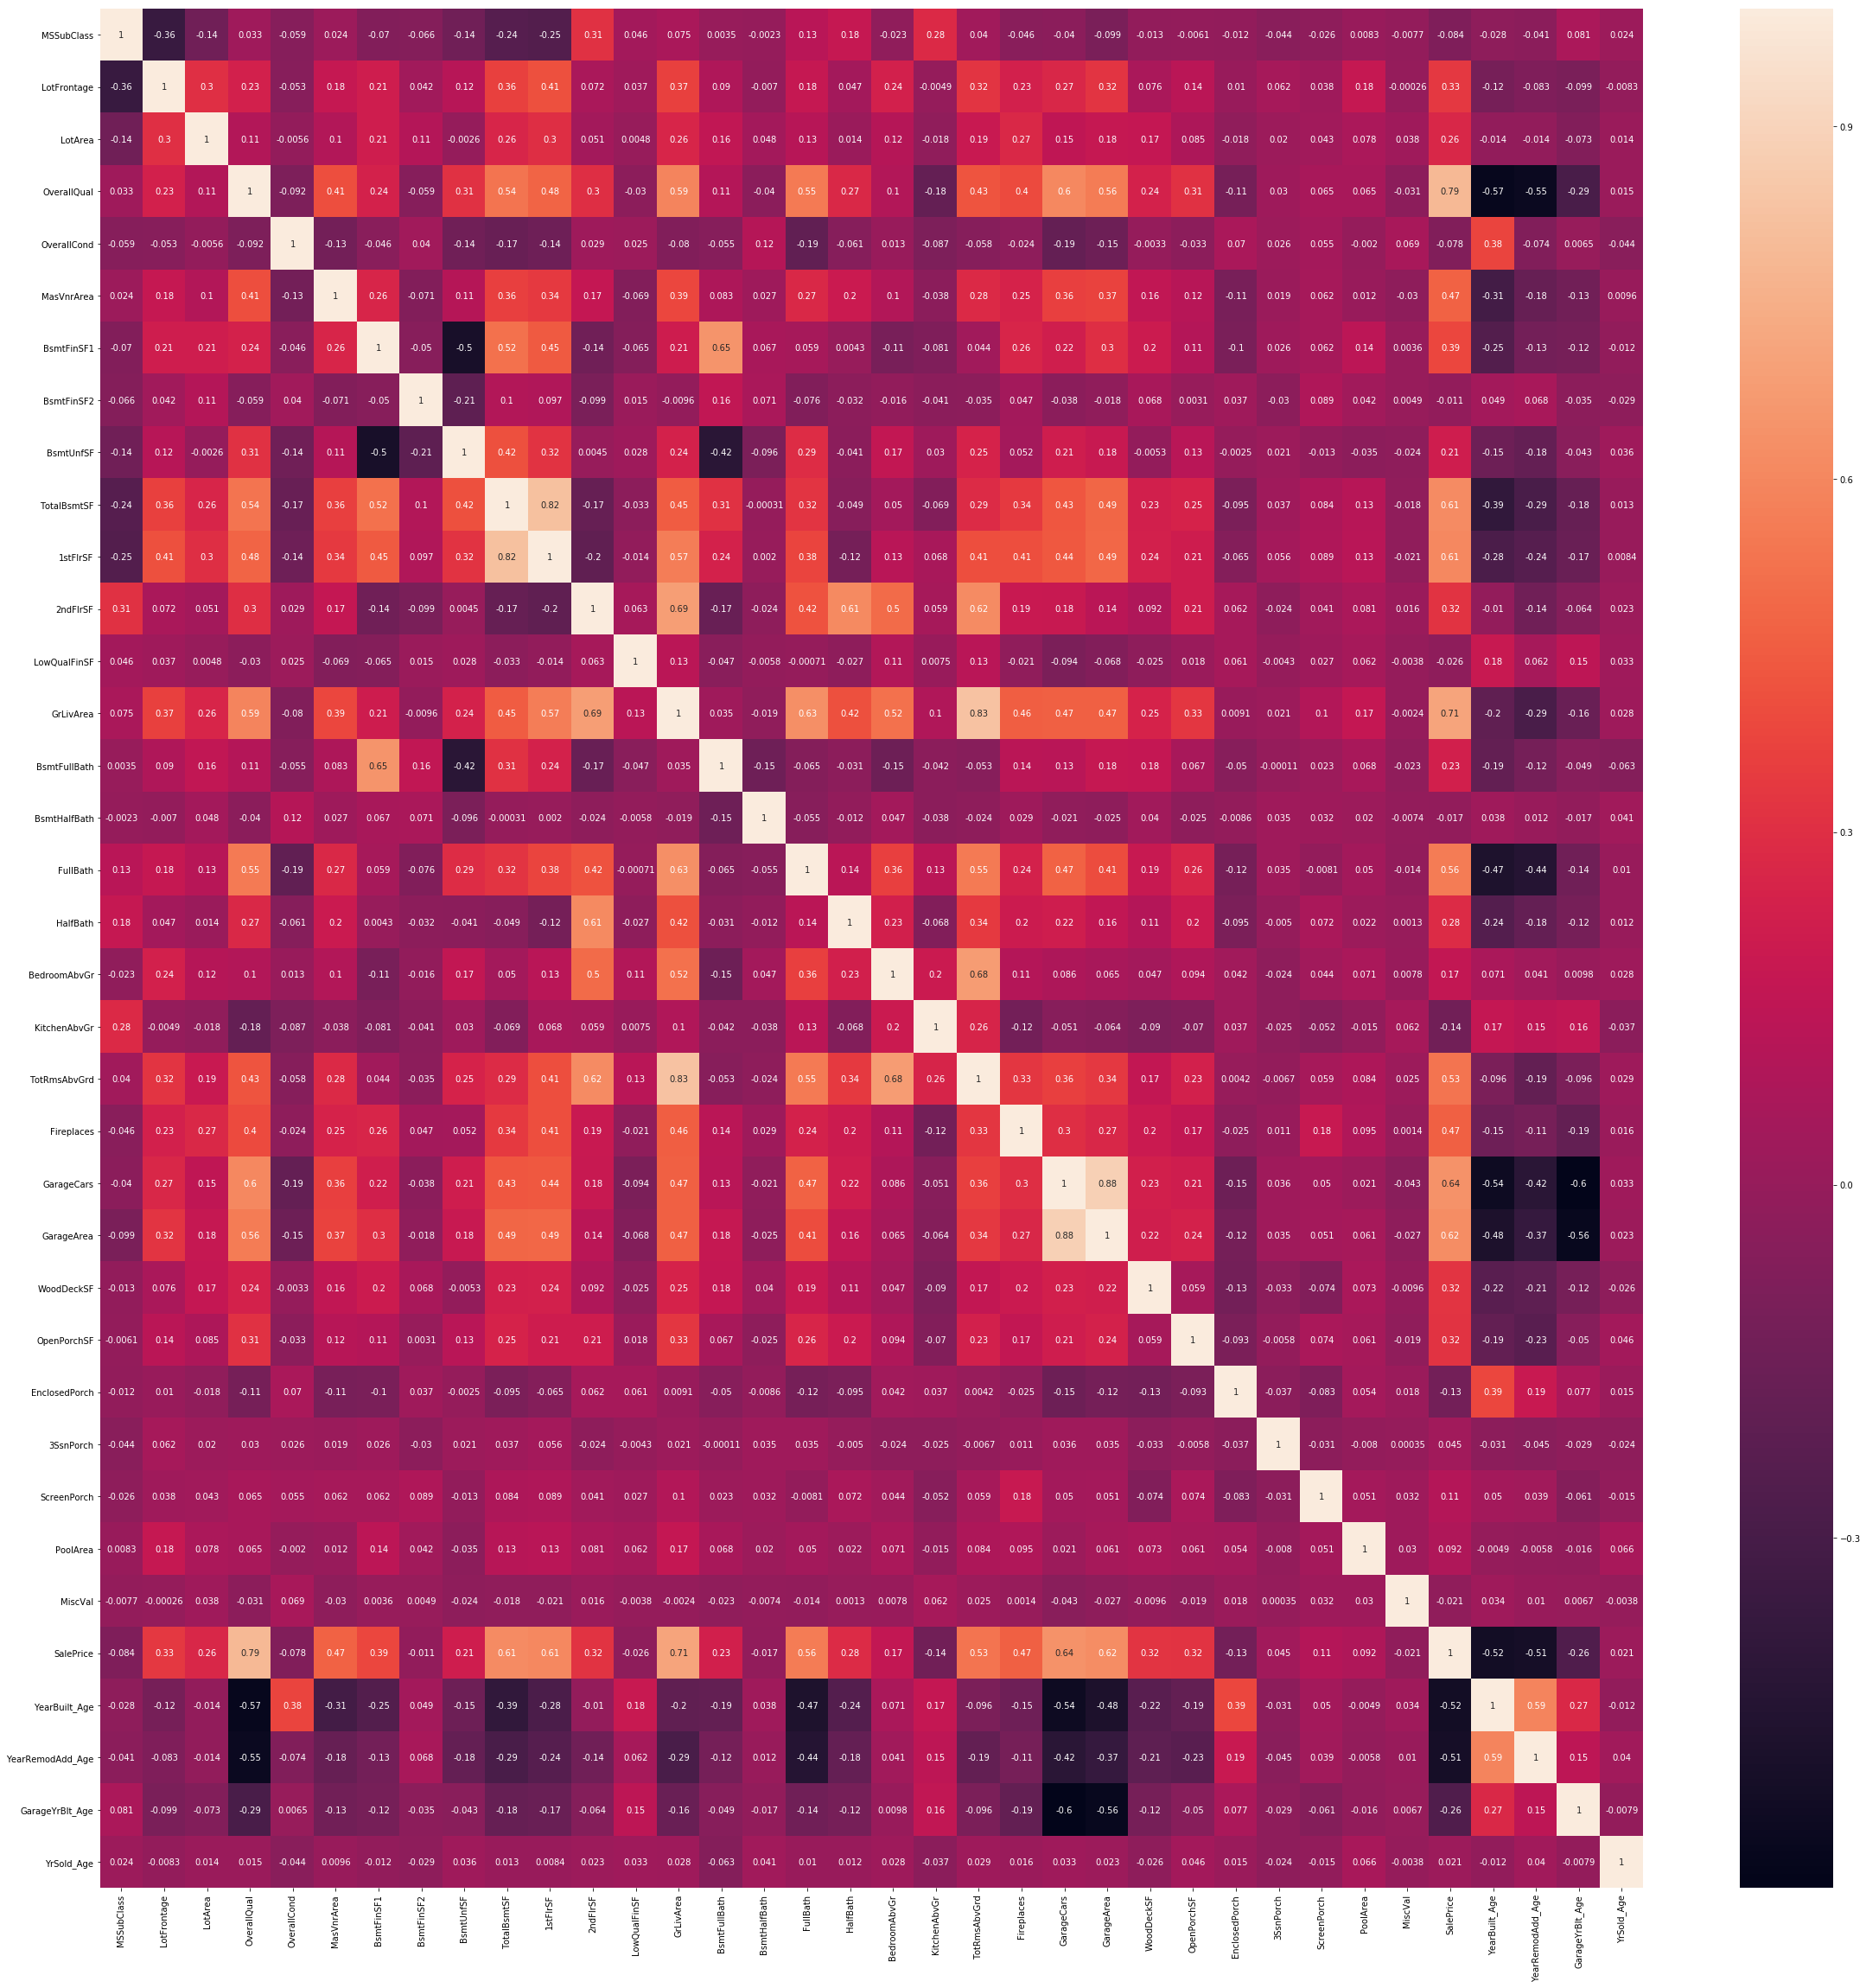

In [160]:
plt.figure(figsize=(40, 40))
sns.heatmap(housing_df.corr(), annot = True)

In [161]:
corr_df = housing_df.corr()[['SalePrice']].sort_values(by = 'SalePrice', ascending = False)
corr_df

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
MasVnrArea,0.472614


Let's remove those features having absolute correlation value less than 0.03

In [162]:
cols_to_del = list(corr_df.index[abs(corr_df.SalePrice) < 0.03])
cols_to_del

['YrSold_Age', 'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 'LowQualFinSF']

In [163]:
housing_df = housing_df.drop(columns = cols_to_del)

In [164]:
housing_df.shape

(1460, 74)

Also the following attributes had 80% or more NA values, so even with imputing also most of the properties belongs to same category hence its predictive power will be less. Lets remove those attributes

In [165]:
housing_df = housing_df.drop(columns = ['Alley', 'PoolQC', 'Fence', 'MiscFeature'])

In [166]:
nullvalues = (housing_df.isnull().sum()/len(housing_df))*100
nullvalues

MSSubClass          0.0
MSZoning            0.0
LotFrontage         0.0
LotArea             0.0
Street              0.0
LotShape            0.0
LandContour         0.0
Utilities           0.0
LotConfig           0.0
LandSlope           0.0
Neighborhood        0.0
Condition1          0.0
Condition2          0.0
BldgType            0.0
HouseStyle          0.0
OverallQual         0.0
OverallCond         0.0
RoofStyle           0.0
RoofMatl            0.0
Exterior1st         0.0
Exterior2nd         0.0
MasVnrType          0.0
MasVnrArea          0.0
ExterQual           0.0
ExterCond           0.0
Foundation          0.0
BsmtQual            0.0
BsmtCond            0.0
BsmtExposure        0.0
BsmtFinType1        0.0
                   ... 
GrLivArea           0.0
BsmtFullBath        0.0
FullBath            0.0
HalfBath            0.0
BedroomAbvGr        0.0
KitchenAbvGr        0.0
KitchenQual         0.0
TotRmsAbvGrd        0.0
Functional          0.0
Fireplaces          0.0
FireplaceQu     

Now let us create a list of all categorical columns and numeric columns

In [167]:
categorical_columns = housing_df.dtypes[housing_df.dtypes == "object"].index
categorical_columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [168]:
numeric_columns = housing_df.dtypes[housing_df.dtypes != "object"].index
numeric_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice',
       'YearBuilt_Age', 'YearRemodAdd_Age', 'GarageYrBlt_Age'],
      dtype='object')

# MODEL BUILDING

As we seen above, the depenedent variable SalePrice is right skewed(Positively Skewed) indicating there are outliers in the data. The linear regression suffers from ouliers. Being said that its not correct to remove the outliers from the datapoint unless we are sure about these outliers are due to error in data entry or data collection. Also there are chances of having ouliers in every population. In this case we will evaluate two sets of model:

1. Model without any outlier treatment
2. Model with outlier treatment

## 1. MODEL - WITHOUT ANY OUTLIER TREATMENT

In [169]:
#Its time to get dummies for all other categorical variables
housing_df_dummy = pd.get_dummies(housing_df[categorical_columns], prefix = categorical_columns, drop_first=True)

In [170]:
housing_df_dummy.columns

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LandContour_HLS', 'LandContour_Low',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=210)

In [171]:
housing_final = pd.concat([housing_df, housing_df_dummy], axis=1)
housing_final = housing_final.drop(columns = categorical_columns)
housing_final.shape

(1460, 241)

In [172]:
# train-test 70-30 split
df_train, df_test = train_test_split(housing_final, train_size = 0.7, test_size = 0.3, random_state = 100)

In [173]:
# rescale the features
scaler = StandardScaler()
Test = list(numeric_columns).copy()
Test.remove('SalePrice')
df_train[Test] = scaler.fit_transform(df_train[Test])

In [174]:
# divide into X_train, y_train
y_train = df_train.pop('SalePrice')
X_train = df_train

In [175]:
X_train.shape

(1021, 240)

In [176]:
df_test[Test] = scaler.transform(df_test[Test])
# divide into X_train, y_train
y_test = df_test.pop('SalePrice')
X_test= df_test

In [177]:
# create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

### 1.1 LASSO MODEL

In [178]:
# specify range of hyperparameters to tune
hyper_params = {'alpha': [.0001,.001, .002, .005, .008, .01, .02, .05, .08, 
                          .1, .2, .5, .8, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 
                          50, 80, 100, 200, 500, 800, 1000]}


# perform grid search
# specify model
model = Lasso()
     

# call GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  

Fitting 5 folds for each of 31 candidates, totalling 155 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 155 out of 155 | elapsed:   27.0s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.002, 0.005, 0.008, 0.01, 0.02, 0.05, 0.08, 0.1, 0.2, 0.5, 0.8, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 80, 100, 200, 500, 800, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [179]:
cv_result_lasso = pd.DataFrame(model_cv.cv_results_)
cv_result_lasso['param_alpha'] = cv_result_lasso['param_alpha'].astype('float32')

In [180]:
cv_result_lasso [['param_alpha','mean_train_score', 'mean_test_score']]

,param_alpha,mean_train_score,mean_test_score
0,0.0001,-11762.649593,-21078.688544
1,0.0010,-11762.627406,-21078.520732
2,0.0020,-11762.608819,-21077.962765
3,0.0050,-11762.573911,-21075.988451
4,0.0080,-11762.554146,-21073.772616
5,0.0100,-11762.541469,-21072.214888
6,0.0200,-11762.497912,-21063.999555
7,0.0500,-11762.452652,-21036.299082
8,0.0800,-11762.430420,-21014.393041
9,0.1000,-11762.441630,-21008.320873


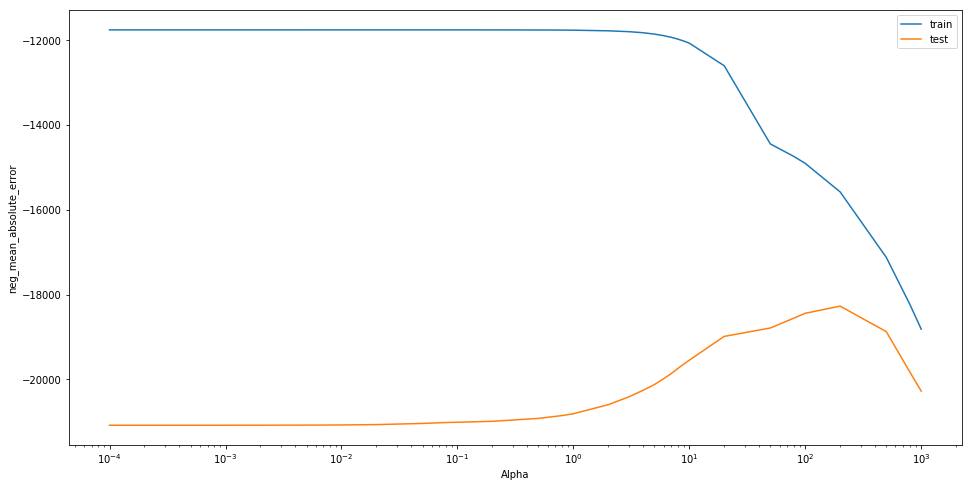

In [181]:
plt.figure(figsize=(16,8))
ax = plt.subplot(1,1,1)
plt.plot(cv_result_lasso['param_alpha'], cv_result_lasso['mean_train_score'], label = 'train')
plt.plot(cv_result_lasso['param_alpha'], cv_result_lasso['mean_test_score'], label = 'test')
ax.legend()
plt.xscale('log')
plt.ylabel('neg_mean_absolute_error')
plt.xlabel('Alpha')
plt.show()

In [182]:
model_cv.best_params_

{'alpha': 200}

From the above plot as well as from the grid search it is clear that optimal value for alpha is 200

In [183]:
#lets train the model with alpha value as 200
lasso = Lasso(alpha=200)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("Train R2 Score - Lasso : ", round(r2_score(y_true=y_train,y_pred=y_train_pred), 4))
print("Test R2 Score - Lasso : ", round(r2_score(y_true=y_test,y_pred=y_test_pred), 4))

Train R2 Score - Lasso :  0.8861
Test R2 Score - Lasso :  0.8638


In [184]:
lasso_coef_df = pd.DataFrame(lasso.coef_ , columns = ['Coefficient'], index =  X_train.columns)

Let's create a DF with top 20 positive and negative coefficient

In [185]:
lasso_coef_df = lasso_coef_df.sort_values(by = 'Coefficient')
important_lasso_coeff = pd.concat([lasso_coef_df.head(20), lasso_coef_df.tail(20)])
important_lasso_coeff

,Coefficient
Condition2_PosN,-99120.275121
BsmtQual_Gd,-21003.112167
KitchenQual_Gd,-20181.187335
KitchenQual_TA,-18303.473550
Neighborhood_Edwards,-12658.824545
BsmtQual_TA,-12050.823676
BsmtExposure_No,-8742.975840
YearBuilt_Age,-8373.843417
MSSubClass,-6954.426808
KitchenQual_Fa,-6465.233291


<B> LASSO- TOP NEGATIVELY CORRELATED FEATURES AND ITS COEFFICIENTS</B>

In [186]:
lasso_coef_df = lasso_coef_df.sort_values(by = 'Coefficient')
important_lasso_coeff = pd.concat([lasso_coef_df.head(20), lasso_coef_df.tail(20)])
print("Top negatively correlated features:")
print(important_lasso_coeff.head(10))

Top negatively correlated features:
                       Coefficient
Condition2_PosN      -99120.275121
BsmtQual_Gd          -21003.112167
KitchenQual_Gd       -20181.187335
KitchenQual_TA       -18303.473550
Neighborhood_Edwards -12658.824545
BsmtQual_TA          -12050.823676
BsmtExposure_No       -8742.975840
YearBuilt_Age         -8373.843417
MSSubClass            -6954.426808
KitchenQual_Fa        -6465.233291


<B>LASSO- TOP POSITIVELY CORRELATED FEATURES AND ITS COEFFICIENTS</B>

In [187]:
print("Top positively correlated features:")
print(lasso_coef_df.sort_values(by = 'Coefficient', ascending = False).head(10))

Top positively correlated features:
                       Coefficient
Neighborhood_NoRidge  41323.381822
RoofMatl_WdShngl      28279.498606
Neighborhood_NridgHt  25964.774461
Neighborhood_Crawfor  20781.499184
GrLivArea             18356.545295
BsmtExposure_Gd       18121.523824
Neighborhood_Somerst  16349.005517
OverallQual           16329.745253
Exterior1st_BrkFace   12534.259470
Condition1_Norm       12374.478672


<Figure size 1440x720 with 0 Axes>

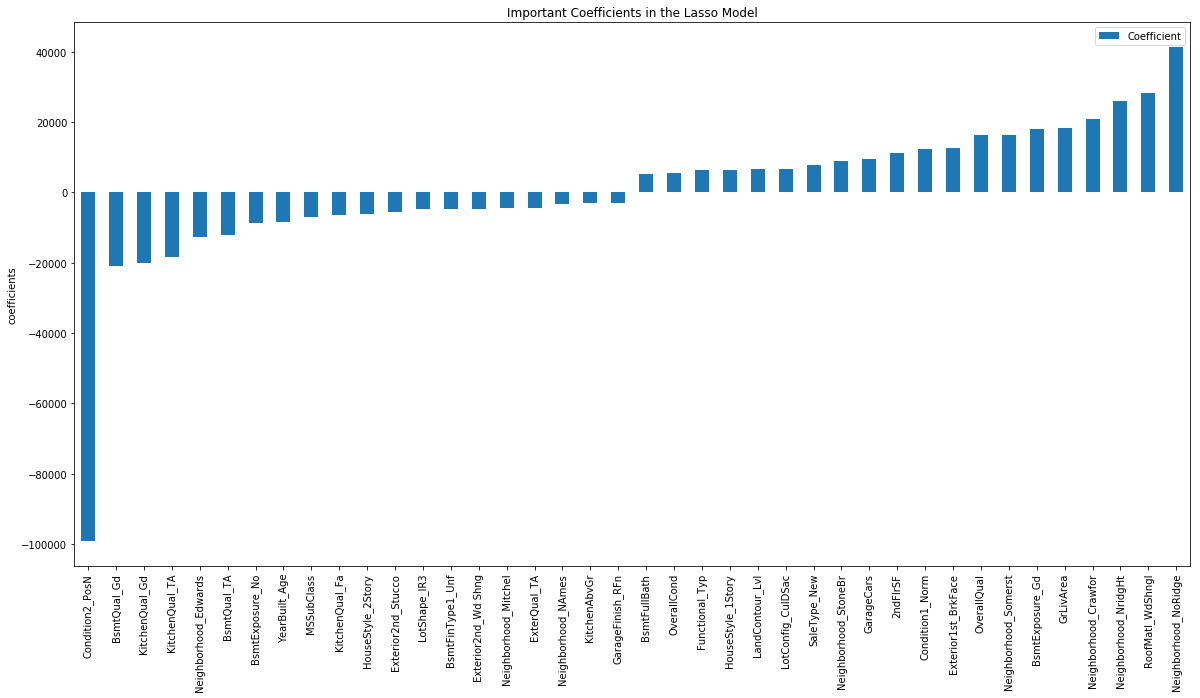

In [188]:
plt.figure(figsize = (20, 10))
important_lasso_coeff.plot(kind = 'bar', figsize = (20, 10))
plt.title("Important Coefficients in the Lasso Model")
plt.ylabel('coefficients')
plt.show()  

Text(0.5, 1.0, 'Error Distribution Test Set - Lasso')

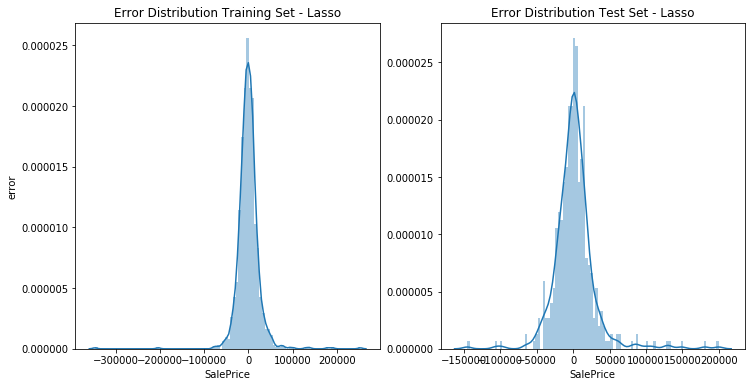

In [189]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot((y_train - y_train_pred), bins = 100)
plt.title('Error Distribution Training Set - Lasso')
plt.ylabel('error')

plt.subplot(1,2,2)
sns.distplot((y_test - y_test_pred), bins = 100)
plt.title('Error Distribution Test Set - Lasso')

<b>Number of features in lasso model</b>

In [190]:
print('Number of features in lasso model: ', len(lasso_coef_df[lasso_coef_df.Coefficient != 0]))

Number of features in lasso model:  81


<h3>MODEL WITH OUTLIERS - LASSO MODEL</h3>

<b>ALPHA = 200</b>

<b>Train R2 Score Lasso :  0.8861</b>

<b>Test R2 Score Lasso :  0.8638</b>

<b>IMPORTANT FEATURES<b>

<b>POSITIVELY CORRELATED:  WITH COEFFICIENT</b>
    1. Neighborhood_NoRidge  41323.381822
    2. RoofMatl_WdShngl      28279.498606
    3. Neighborhood_NridgHt  25964.774461
    4. Neighborhood_Crawfor  20781.499184
    5. GrLivArea             18356.545295
    6. BsmtExposure_Gd       18121.523824
    7. Neighborhood_Somerst  16349.005517
    8. OverallQual           16329.745253
    9. Exterior1st_BrkFace   12534.259470
    10. Condition1_Norm      12374.478672

<b>NEGATIVELY CORRELATED:  WITH COEFFICIENT</b>
    1. Condition2_PosN      -99120.275121
    2. BsmtQual_Gd          -21003.112167
    3. KitchenQual_Gd       -20181.187335
    4. KitchenQual_TA       -18303.473550
    5. Neighborhood_Edwards -12658.824545
    6. BsmtQual_TA          -12050.823676
    7. BsmtExposure_No       -8742.975840
    8. YearBuilt_Age         -8373.843417
    9. MSSubClass            -6954.426808
    10. KitchenQual_Fa        -6465.233291


### 1.2. RIDGE MODEL

In [191]:
# specify range of hyperparameters to tune
hyper_params = {'alpha': [.0001,.001, .002, .005, .008, .01, .02, .05, .08, 
                          .1, .2, .5, .8, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 
                          50, 80, 100, 200, 500, 800, 1000]}


# perform grid search
# specify model
RidgeModel = Ridge()
     

# call GridSearchCV()
model_cv = GridSearchCV(estimator = RidgeModel, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  

Fitting 5 folds for each of 31 candidates, totalling 155 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 155 out of 155 | elapsed:    2.3s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.002, 0.005, 0.008, 0.01, 0.02, 0.05, 0.08, 0.1, 0.2, 0.5, 0.8, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 80, 100, 200, 500, 800, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [192]:
cv_result_ridge = pd.DataFrame(model_cv.cv_results_)
cv_result_ridge['param_alpha'] = cv_result_ridge['param_alpha'].astype('float32')

In [193]:
cv_result_ridge [['param_alpha','mean_train_score', 'mean_test_score']]

,param_alpha,mean_train_score,mean_test_score
0,0.0001,-11762.812359,-21014.346525
1,0.0010,-11760.274597,-20945.588233
2,0.0020,-11759.543330,-20875.026576
3,0.0050,-11771.994645,-20716.328975
4,0.0080,-11800.630012,-20615.833869
5,0.0100,-11825.067986,-20581.796716
6,0.0200,-11978.844867,-20495.313449
7,0.0500,-12448.608752,-20498.728436
8,0.0800,-12780.856528,-20560.155567
9,0.1000,-12941.915344,-20583.077299


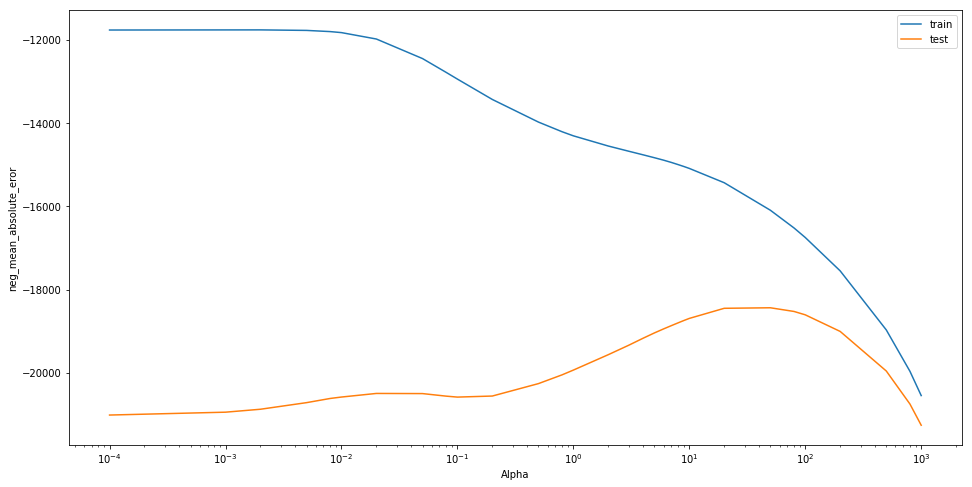

In [194]:
plt.figure(figsize=(16,8))
ax = plt.subplot(1,1,1)
plt.plot(cv_result_ridge['param_alpha'],cv_result_ridge['mean_train_score'], label = 'train')
plt.plot(cv_result_ridge['param_alpha'],cv_result_ridge['mean_test_score'], label = 'test')
ax.legend()
plt.xscale('log')
plt.ylabel('neg_mean_absolute_eror')
plt.xlabel('Alpha')
plt.show()

In [195]:
model_cv.best_params_

{'alpha': 50}

As we can see from the graph and grid search, it is clear that neg mean train absolute error is maximum when alpha is 50.

In [196]:
ridge = Ridge(alpha = 50)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print("R2 Score Training Set: ", round(r2_score(y_train,y_pred_train), 4))

y_pred_test = ridge.predict(X_test)
print("R2 Score Test Set: ", round(r2_score(y_test,y_pred_test), 4))

R2 Score Training Set:  0.8694
R2 Score Test Set:  0.8667


In [197]:
ridge_coef_df = pd.DataFrame(ridge.coef_ , columns = ['Coefficient'], index =  X_train.columns)

In [198]:
ridge_coef_df = ridge_coef_df.sort_values(by = 'Coefficient')
important_ridge_coeff = pd.concat([ridge_coef_df.head(20), ridge_coef_df.tail(20)])
important_ridge_coeff

,Coefficient
BsmtQual_Gd,-14572.983319
KitchenQual_Gd,-10858.995128
Neighborhood_Edwards,-10368.902902
KitchenQual_TA,-8688.822874
BsmtExposure_No,-8494.516022
BsmtQual_TA,-7979.479921
ExterQual_TA,-6956.855109
MSSubClass,-6712.956599
Condition2_PosN,-5840.370390
YearBuilt_Age,-5623.686647


<B>RIGDE - TOP NEGATIVELY CORRELATED FEATURES AND ITS COEFFICIENTS</B>

In [199]:
ridge_coef_df = ridge_coef_df.sort_values(by = 'Coefficient')
important_ridge_coeff = pd.concat([ridge_coef_df.head(20), ridge_coef_df.tail(20)])
print("Top negatively correlated features:")
print(important_ridge_coeff.head(10))

Top negatively correlated features:
                       Coefficient
BsmtQual_Gd          -14572.983319
KitchenQual_Gd       -10858.995128
Neighborhood_Edwards -10368.902902
KitchenQual_TA        -8688.822874
BsmtExposure_No       -8494.516022
BsmtQual_TA           -7979.479921
ExterQual_TA          -6956.855109
MSSubClass            -6712.956599
Condition2_PosN       -5840.370390
YearBuilt_Age         -5623.686647


<B>RIDGE- TOP POSITIVELY CORRELATED FEATURES AND ITS COEFFICIENTS</B>

In [200]:
print("Top positively correlated features:")
print(ridge_coef_df.sort_values(by = 'Coefficient', ascending = False).head(10))

Top positively correlated features:
                       Coefficient
OverallQual           16978.242982
Neighborhood_NoRidge  14653.952737
GrLivArea             13098.330896
Neighborhood_NridgHt  12560.842670
2ndFlrSF              11497.307720
BsmtExposure_Gd       11167.968110
Condition1_Norm        9470.286799
GarageCars             9241.743607
Neighborhood_Crawfor   8225.477876
1stFlrSF               6915.424815


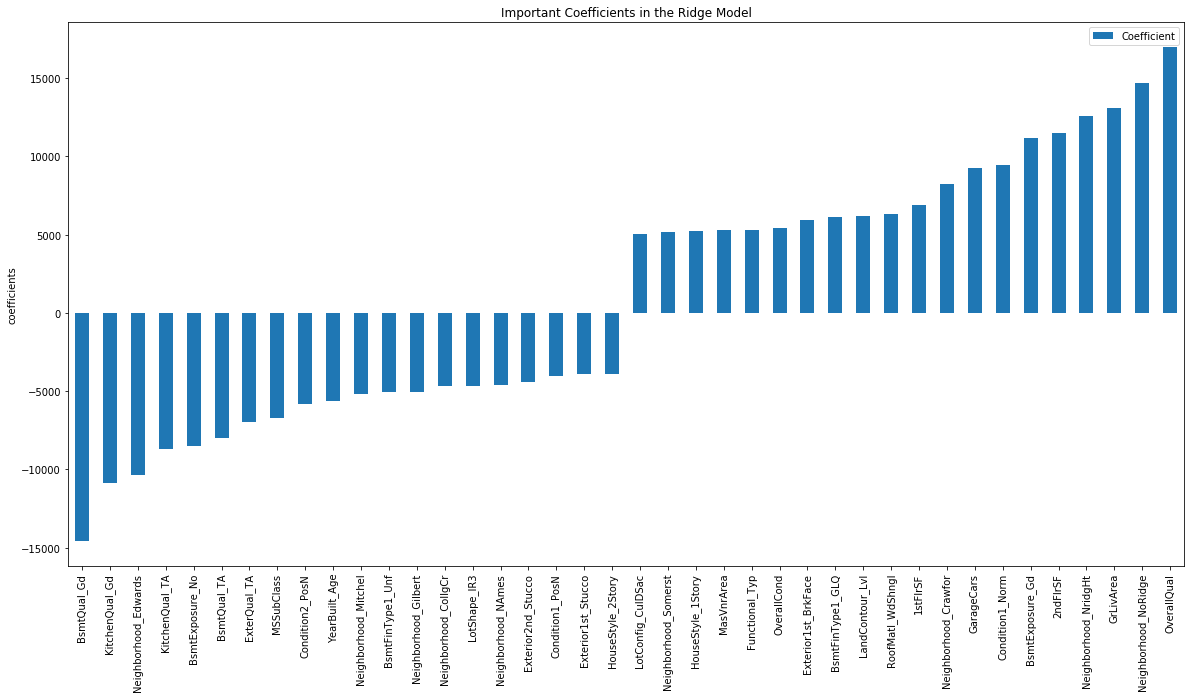

In [201]:
important_ridge_coeff.plot(kind = 'bar', figsize = (20, 10))
plt.title("Important Coefficients in the Ridge Model")
plt.ylabel('coefficients')
plt.show()  

Text(0.5, 1.0, 'Error Distribution Test Set - Ridge')

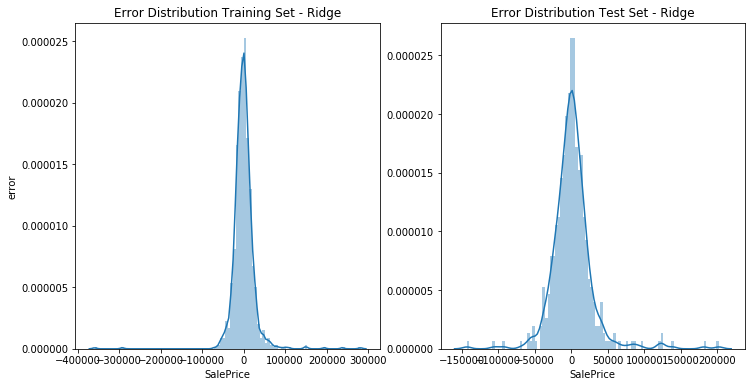

In [202]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot((y_train - y_pred_train), bins = 100)
plt.ylabel('error')
plt.title('Error Distribution Training Set - Ridge')

plt.subplot(1,2,2)
sns.distplot((y_test - y_pred_test), bins = 100)
plt.title('Error Distribution Test Set - Ridge')

In [203]:
len(ridge_coef_df[ridge_coef_df.Coefficient != 0])

237

<h3> MODEL WITH OUTLIERS : RIDGE MODEL</h3>

<b> ALPHA = 50 </b>

<b>Train R2 Score Ridge :  0.8694 </b>

<b>Test R2 Score Ridge :  0.8667 </b>

<b> IMPORTANT FEATURES<b>

<b>POSITIVELY CORRELATED: COEFFICIENT</b>
    1. OverallQual           16978.242982
    2. Neighborhood_NoRidge  14653.952737
    3. GrLivArea             13098.330896
    4. Neighborhood_NridgHt  12560.842670
    5. 2ndFlrSF              11497.307720
    6. BsmtExposure_Gd       11167.968110
    7. Condition1_Norm        9470.286799
    8. GarageCars             9241.743607
    9. Neighborhood_Crawfor   8225.477876
    10. 1stFlrSF              6915.424815

<b>NEGATIVELY CORRELATED: COEFFICENT</b>
    1. BsmtQual_Gd          -14572.983319
    2. KitchenQual_Gd       -10858.995128
    3. Neighborhood_Edwards -10368.902902
    4. KitchenQual_TA        -8688.822874
    5. BsmtExposure_No       -8494.516022
    6. BsmtQual_TA           -7979.479921
    7. ExterQual_TA          -6956.855109
    8. MSSubClass            -6712.956599
    9. Condition2_PosN       -5840.370390
    10. YearBuilt_Age        -5623.686647


# 2. MODEL - WITH OUTLIER TREATMENT

## LOG TRANFORMATION ON DEPENDENT VARIABLE

We have already built model without treating the outliers in the dataset. As mentioned earlier it is not correct to remove the outliers unless we are sure that it is due to data entry errors. Since our case is not a data entry issue and the number of data points are less we need to look into alternatives for outlier treatment. As we have already seen in the graph above the SalePrice (depenedent variable) is highly positively skewed (right skewed). So the one of the easiest option is to use log transformation to convert the right skewed data to normally distributed data.

In [204]:
housing_df['SalePriceLog'] = housing_df['SalePrice'].map(lambda x: np.log(x))

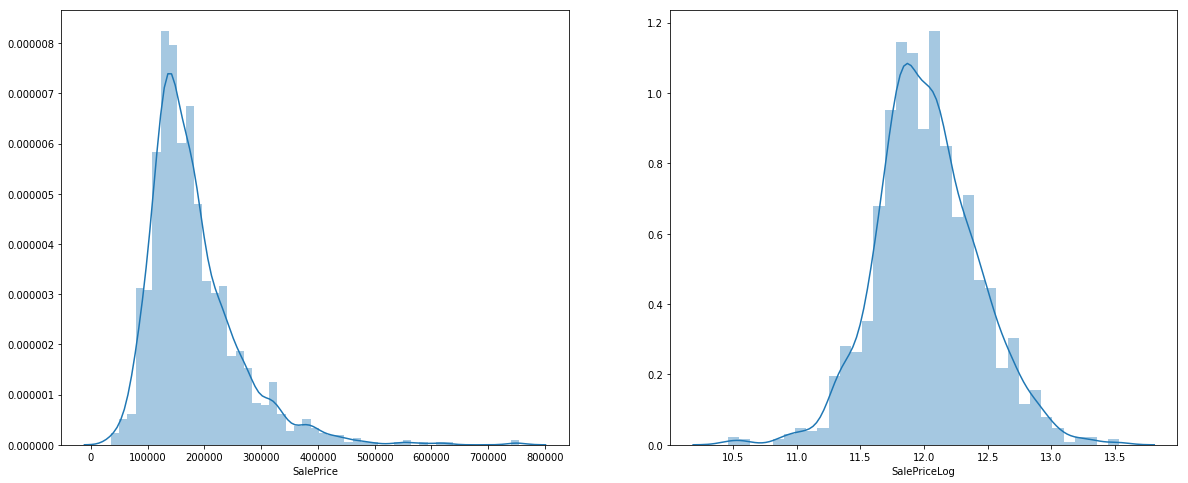

In [205]:
plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)
sns.distplot(housing_df.SalePrice)
plt.subplot(1, 2, 2)
sns.distplot(housing_df.SalePriceLog)

In [206]:
housing_df_old = housing_df.copy()
housing_df['SalePrice'] = housing_df['SalePriceLog']
housing_df.drop(columns = 'SalePriceLog', inplace = True)

In [207]:
#Its time to get dummies for all other categorical variables
housing_df_dummy = pd.get_dummies(housing_df[categorical_columns], prefix = categorical_columns, drop_first=True)

In [208]:
housing_df_dummy.columns

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LandContour_HLS', 'LandContour_Low',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=210)

In [209]:
housing_final = pd.concat([housing_df, housing_df_dummy], axis=1)
housing_final = housing_final.drop(columns = categorical_columns)
housing_final.shape

(1460, 241)

In [210]:
# train-test 70-30 split
df_train, df_test = train_test_split(housing_final, train_size = 0.7, test_size = 0.3, random_state = 100)

In [211]:
# rescale the features
scaler = StandardScaler()
Test = list(numeric_columns).copy()
Test.remove('SalePrice')
df_train[Test] = scaler.fit_transform(df_train[Test])

In [212]:
# divide into X_train, y_train
y_train = df_train.pop('SalePrice')
X_train = df_train

In [213]:
X_train.shape

(1021, 240)

In [214]:
df_test[Test] = scaler.transform(df_test[Test])
# divide into X_train, y_train
y_test = df_test.pop('SalePrice')
X_test= df_test

In [215]:
# create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

### 2.1 LASSO MODEL

In [216]:
# specify range of hyperparameters to tune
hyper_params = {'alpha': [.0001,.001, .002, .005, .008, .01, .02, .05, .08, 
                          .1, .2, .5, .8, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 
                          50, 80, 100, 200, 500, 800, 1000]}


# perform grid search
# specify model
model = Lasso()
     

# call GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  

Fitting 5 folds for each of 31 candidates, totalling 155 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 155 out of 155 | elapsed:    2.8s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.002, 0.005, 0.008, 0.01, 0.02, 0.05, 0.08, 0.1, 0.2, 0.5, 0.8, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 80, 100, 200, 500, 800, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [217]:
cv_result_lasso = pd.DataFrame(model_cv.cv_results_)
cv_result_lasso['param_alpha'] = cv_result_lasso['param_alpha'].astype('float32')

In [218]:
cv_result_lasso [['param_alpha','mean_train_score', 'mean_test_score']]

,param_alpha,mean_train_score,mean_test_score
0,0.0001,-0.061907,-0.092882
1,0.0010,-0.078968,-0.091829
2,0.0020,-0.084862,-0.093887
3,0.0050,-0.093133,-0.098726
4,0.0080,-0.096690,-0.101710
5,0.0100,-0.098176,-0.102851
6,0.0200,-0.104609,-0.108390
7,0.0500,-0.125737,-0.127898
8,0.0800,-0.146226,-0.148443
9,0.1000,-0.161443,-0.163585


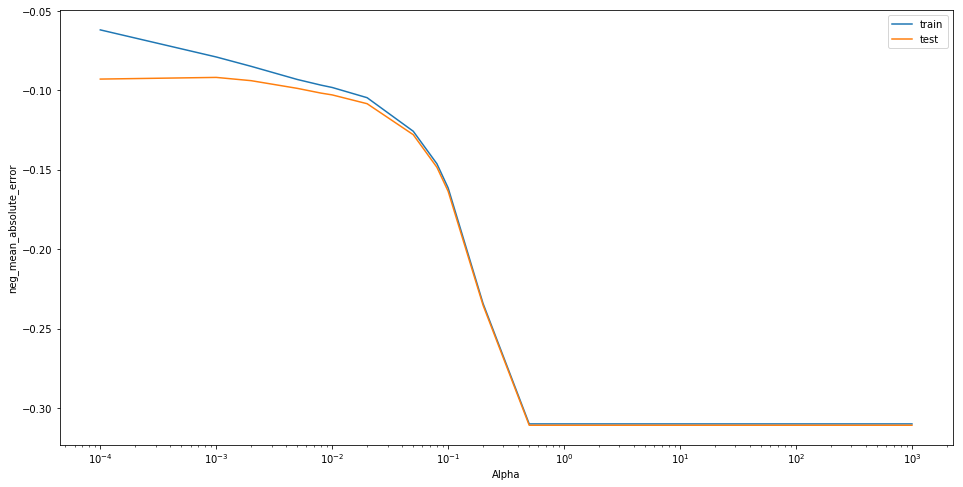

In [219]:
plt.figure(figsize=(16,8))
ax = plt.subplot(1,1,1)
ax.plot(cv_result_lasso['param_alpha'],cv_result_lasso['mean_train_score'], label = 'train')
ax.plot(cv_result_lasso['param_alpha'],cv_result_lasso['mean_test_score'], label = 'test')
ax.legend()
plt.xscale('log')
plt.ylabel('neg_mean_absolute_error')
plt.xlabel('Alpha')
plt.show()

In [220]:
model_cv.best_params_

{'alpha': 0.001}

From the plot as well as from grid search its clear that alpha = 0.001 has the max neg mean absolute error

In [221]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("Train R2 Score: ", round(r2_score(y_true=y_train,y_pred=y_train_pred), 4))
print("Test R2 Score: ", round(r2_score(y_true=y_test,y_pred=y_test_pred), 4))

Train R2 Score:  0.9061
Test R2 Score:  0.8832


In [222]:
print(mean_squared_error(y_true=y_train,y_pred=y_train_pred))
print(mean_squared_error(y_true=y_test,y_pred=y_test_pred))

0.014764973834912442
0.01921693941015144


In [223]:
lasso_coef_df = pd.DataFrame(lasso.coef_ , columns = ['Coefficient'], index =  X_train.columns)

<B> LASSO- TOP NEGATIVELY CORRELATED FEATURES AND ITS COEFFICIENTS</B>

In [224]:
lasso_coef_df = lasso_coef_df.sort_values(by = 'Coefficient')
important_lasso_coeff = pd.concat([lasso_coef_df.head(20), lasso_coef_df.tail(20)])
print("Top negatively correlated features:")
print(important_lasso_coeff.head(10))

Top negatively correlated features:
                      Coefficient
Condition2_PosN         -0.188209
Neighborhood_Edwards    -0.064977
BldgType_Twnhs          -0.054625
YearBuilt_Age           -0.051123
Neighborhood_IDOTRR     -0.045840
FireplaceQu_No          -0.042326
BsmtFinType1_Unf        -0.037876
YearRemodAdd_Age        -0.021462
MSSubClass              -0.020707
BsmtQual_Gd             -0.019044


<B>LASSO- TOP POSITIVELY CORRELATED FEATURES AND ITS COEFFICIENTS</B>

In [225]:
print("Top positively correlated features:")
print(lasso_coef_df.sort_values(by = 'Coefficient', ascending = False).head(10))

Top positively correlated features:
                      Coefficient
Neighborhood_Crawfor     0.115553
GrLivArea                0.114898
Neighborhood_Somerst     0.102124
OverallQual              0.090466
Neighborhood_NridgHt     0.087760
Exterior1st_BrkFace      0.060069
Condition1_Norm          0.059722
MSZoning_RL              0.056445
BsmtExposure_Gd          0.051912
Neighborhood_ClearCr     0.049095


<B>IMPORTANT COEFFICIENTS</B>

<Figure size 1440x720 with 0 Axes>

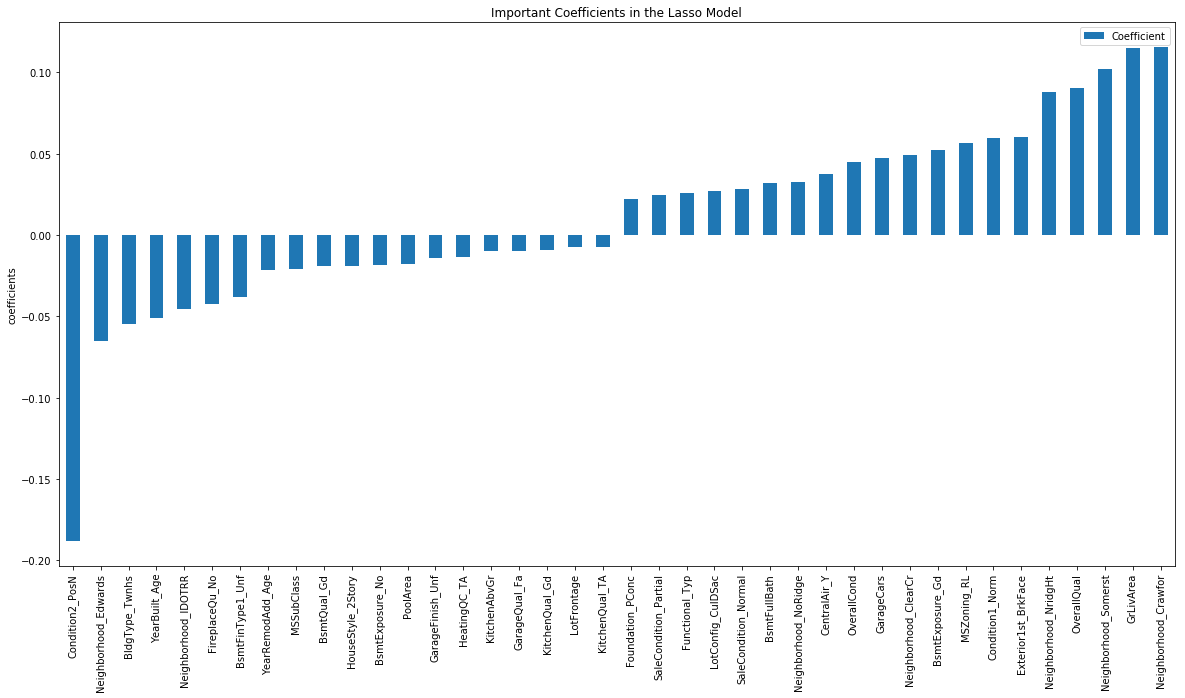

In [226]:
plt.figure(figsize = (20, 10))
important_lasso_coeff.plot(kind = 'bar', figsize = (20, 10))
plt.title("Important Coefficients in the Lasso Model")
plt.ylabel('coefficients')
plt.show()  

Text(0.5, 1.0, 'Error Distribution Test Set - Lasso')

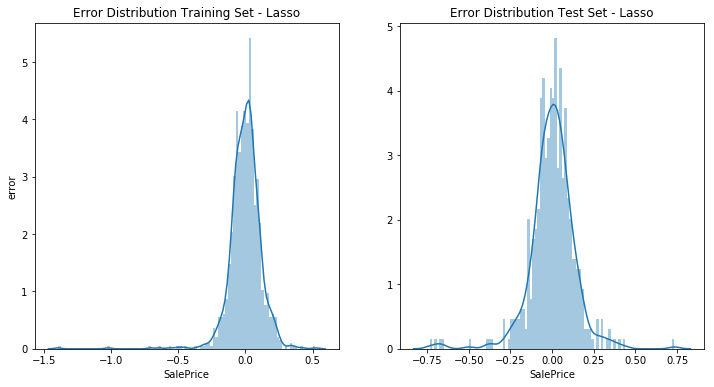

In [227]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot((y_train - y_train_pred), bins = 100)
plt.title('Error Distribution Training Set - Lasso')
plt.ylabel('error')

plt.subplot(1,2,2)
sns.distplot((y_test - y_test_pred), bins = 100)
plt.title('Error Distribution Test Set - Lasso')

</b> Number of features in Lasso Model</b>

In [228]:
print('Number of features in Lasso Model : ', len(lasso_coef_df[lasso_coef_df.Coefficient != 0]))

Number of features in Lasso Model :  77


<h3> MODEL WITH OUTLIER TREATMENT - LASSO MODEL</h3>

<b>ALPHA = 0.001</b>

<b>Train R2 Score Lasso :  0.9061</b>

<b>Test R2 Score Lasso :  0.8832</b>

<b>Number of attributes : 77 </b>

<b>IMPORTANT FEATURES<b>

<b>POSITIVELY CORRELATED: COEFFICIENTS</b>
    1. Neighborhood_Crawfor     0.115553
    2. GrLivArea                0.114898
    3. Neighborhood_Somerst     0.102124
    4. OverallQual              0.090466
    5. Neighborhood_NridgHt     0.087760
    6. Exterior1st_BrkFace      0.060069
    7. Condition1_Norm          0.059722
    8. MSZoning_RL              0.056445
    9. BsmtExposure_Gd          0.051912
    10. Neighborhood_ClearCr    0.049095

<b>NEGATIVELY CORRELATED: COEFFICIENTS</b>
    1. Condition2_PosN         -0.188209
    2. Neighborhood_Edwards    -0.064977
    3. BldgType_Twnhs          -0.054625
    4. YearBuilt_Age           -0.051123
    5. Neighborhood_IDOTRR     -0.045840
    6. FireplaceQu_No          -0.042326
    7. BsmtFinType1_Unf        -0.037876
    8. YearRemodAdd_Age        -0.021462
    9. MSSubClass              -0.020707
    10. BsmtQual_Gd            -0.019044


### 2.2. RIDGE MODEL

In [229]:
# pecify range of hyperparameters to tune
hyper_params = {'alpha': [.0001,.001, .002, .005, .008, .01, .02, .05, .08, 
                          .1, .2, .5, .8, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 
                          50, 80, 100, 200, 500, 800, 1000]}


# perform grid search
# specify model
RidgeModel = Ridge()
     

# call GridSearchCV()
model_cv = GridSearchCV(estimator = RidgeModel, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  

Fitting 5 folds for each of 31 candidates, totalling 155 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 155 out of 155 | elapsed:    2.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.002, 0.005, 0.008, 0.01, 0.02, 0.05, 0.08, 0.1, 0.2, 0.5, 0.8, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 80, 100, 200, 500, 800, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [230]:
cv_result_ridge = pd.DataFrame(model_cv.cv_results_)
cv_result_ridge['param_alpha'] = cv_result_ridge['param_alpha'].astype('float32')

In [231]:
cv_result_ridge [['param_alpha','mean_train_score', 'mean_test_score']]

,param_alpha,mean_train_score,mean_test_score
0,0.0001,-0.055442,-0.103162
1,0.0010,-0.055475,-0.102943
2,0.0020,-0.055519,-0.102715
3,0.0050,-0.055690,-0.102226
4,0.0080,-0.055906,-0.101852
5,0.0100,-0.056058,-0.101648
6,0.0200,-0.056867,-0.101002
7,0.0500,-0.058880,-0.100362
8,0.0800,-0.060306,-0.100076
9,0.1000,-0.061012,-0.099922


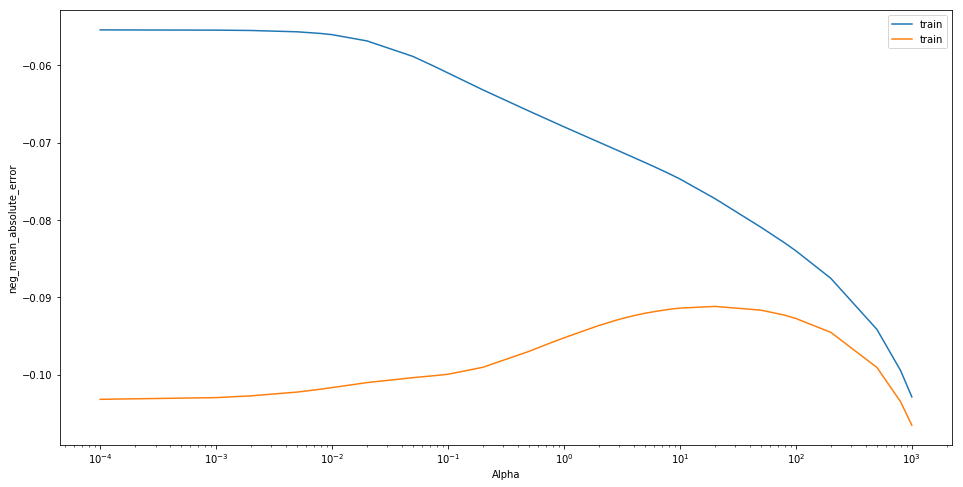

In [232]:
plt.figure(figsize=(16,8))
ax = plt.subplot(1,1,1)
plt.plot(cv_result_ridge['param_alpha'],cv_result_ridge['mean_train_score'], label = 'train')
plt.plot(cv_result_ridge['param_alpha'],cv_result_ridge['mean_test_score'], label = 'train')
ax.legend()
plt.xscale('log')
plt.ylabel('neg_mean_absolute_error')
plt.xlabel('Alpha')
plt.show()

In [233]:
model_cv.best_params_

{'alpha': 20}

From the plot above and from grid serach it is clear that for alpha = 20 the negative mean absolute error is max.

In [234]:
ridge = Ridge(alpha = 20)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print("R2 Score Training Set: ", round(r2_score(y_train,y_pred_train), 4))

y_pred_test = ridge.predict(X_test)
print("R2 Score Test Set: ", round(r2_score(y_test,y_pred_test), 4))

R2 Score Training Set:  0.9138
R2 Score Test Set:  0.8871


In [235]:
print(mean_squared_error(y_true=y_train,y_pred=y_pred_train))
print(mean_squared_error(y_true=y_test,y_pred=y_pred_test))

0.013547599695084931
0.018577588260036047


In [236]:
ridge_coef_df = pd.DataFrame(ridge.coef_ , columns = ['Coefficient'], index =  X_train.columns)

<B>RIGDE - TOP NEGATIVELY CORRELATED FEATURES AND ITS COEFFICIENTS</B>

In [237]:
ridge_coef_df = ridge_coef_df.sort_values(by = 'Coefficient')
important_ridge_coeff = pd.concat([ridge_coef_df.head(20), ridge_coef_df.tail(20)])
print("Top negatively correlated features:")
print(important_ridge_coeff.head(10))

Top negatively correlated features:
                      Coefficient
Neighborhood_Edwards    -0.070439
Condition2_PosN         -0.051668
Neighborhood_IDOTRR     -0.050899
BsmtFinType1_Unf        -0.040423
BldgType_Twnhs          -0.039370
BsmtQual_Gd             -0.037605
YearBuilt_Age           -0.035304
FireplaceQu_No          -0.035222
BsmtQual_TA             -0.034851
LotShape_IR3            -0.033360


<B>RIDGE- TOP POSITIVELY CORRELATED FEATURES AND ITS COEFFICIENTS</B>

In [238]:
print("Top positively correlated features:")
print(ridge_coef_df.sort_values(by = 'Coefficient', ascending = False).head(10))

Top positively correlated features:
                      Coefficient
OverallQual              0.083057
Neighborhood_Crawfor     0.082692
Neighborhood_NridgHt     0.064552
GrLivArea                0.062579
Neighborhood_Somerst     0.055526
Condition1_Norm          0.053739
MSZoning_RL              0.046273
Exterior1st_BrkFace      0.044615
BsmtExposure_Gd          0.044434
GarageCars               0.042350


<B>IMPORTANT COEFFICIENTS</B>

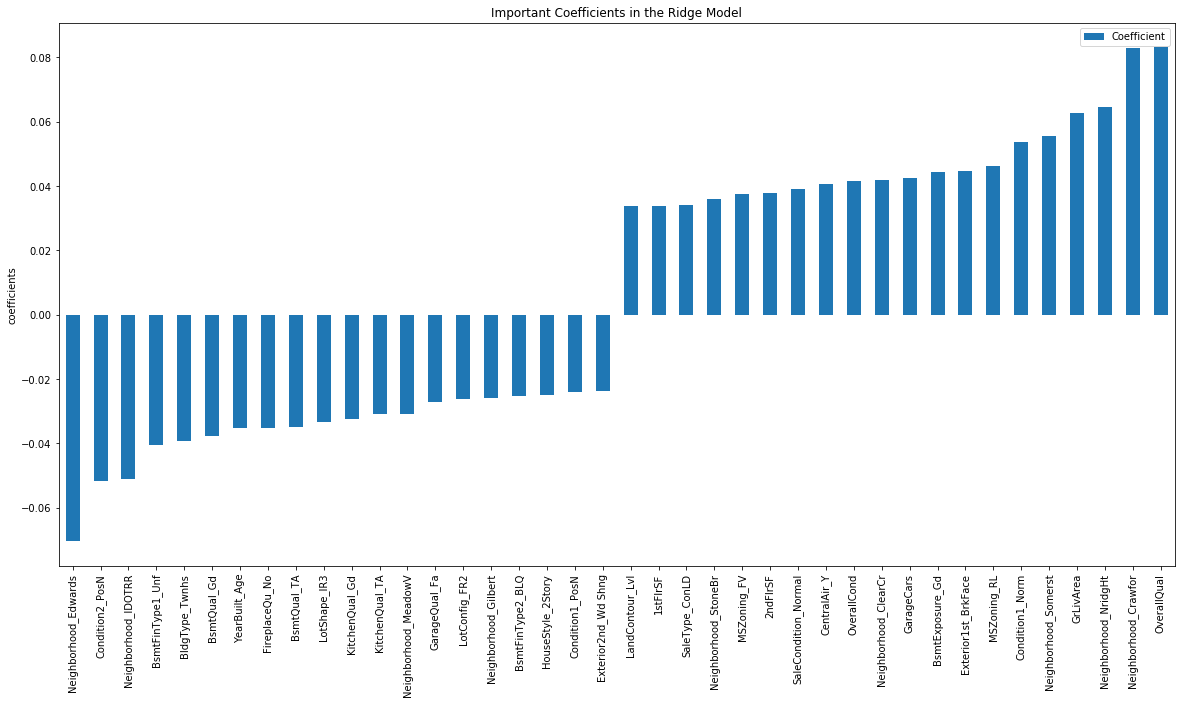

In [239]:
important_ridge_coeff.plot(kind = 'bar', figsize = (20, 10))
plt.title("Important Coefficients in the Ridge Model")  
plt.ylabel('coefficients')
plt.show()  

Text(0, 0.5, 'error')

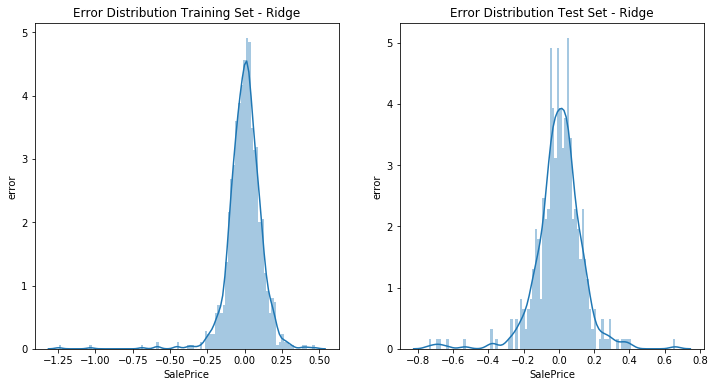

In [240]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot((y_train - y_pred_train), bins = 100)
plt.title('Error Distribution Training Set - Ridge')
plt.ylabel('error')

plt.subplot(1,2,2)
sns.distplot((y_test - y_pred_test), bins = 100)
plt.title('Error Distribution Test Set - Ridge')
plt.ylabel('error')

In [241]:
len(ridge_coef_df[ridge_coef_df.Coefficient != 0])

237

<h3>MODEL WITH OUTLIER TREATMENT- RIDGE MODEL </h3>

<b>ALPHA = 20 </b>

<b>Train R2 Score Ridge :  0.9138 </b>

<b>Test R2 Score Ridge :  0.8871 </b>

<b>Number of attributes: 237 </b>

<b> IMPORTANT FEATURES<b>

<b>POSITIVELY CORRELATED:  COEFFICIENT</b>
    1. OverallQual              0.083057
    2. Neighborhood_Crawfor     0.082692
    3. Neighborhood_NridgHt     0.064552
    4. GrLivArea                0.062579
    5. Neighborhood_Somerst     0.055526
    6. Condition1_Norm          0.053739
    7. MSZoning_RL              0.046273
    8. Exterior1st_BrkFace      0.044615
    9. BsmtExposure_Gd          0.044434
    10. GarageCars              0.042350

<b>NEGATIVELY CORRELATED:   COEFFICIENT</b>
    1. Neighborhood_Edwards    -0.070439
    2. Condition2_PosN         -0.051668
    3. Neighborhood_IDOTRR     -0.050899
    4. BsmtFinType1_Unf        -0.040423
    5. BldgType_Twnhs          -0.039370
    6. BsmtQual_Gd             -0.037605
    7. YearBuilt_Age           -0.035304
    8. FireplaceQu_No          -0.035222
    9. BsmtQual_TA             -0.034851
    10. LotShape_IR3           -0.033360


# CONCLUSION

During the model building considered two sets of models, one with outlier treatment and without outlier treatment. It is observed that the model built with outlier treatment (log transformation) is yielding better results and is more genaralizable.
Now considering the model with outlier treatment, following are the optimal alpha param for ridge and lasso regression:

|DETAILS     |RIDGE |LASSO|
|--------- |------|-----|
|OPTIMAL ALPHA |20 |0.001|
|TRAIN R2 SCORE|0.9138|0.9061|
|TEST R2 SCORE|0.8871|0.8832|
|DIFF B/W TEST AND TRAIN (TEST R2 – TRAIN R2)|0.0267|0.0229|
|ATTRIBUTES IN THE MODEL|237|77|

Will choose LASSO model with Alpha parameter as 0.001 over ridge model because of the following reasons:
1.	There is not much difference in Test R2 score between Ridge and Lasso models. Though ridge model has R2 score slightly higher compared to Lasso; it is observed that Lasso model’s train R2 score and test R2 score are much closer to each other. So, Lasso model is slightly better generalized model.

2.	Also, if we consider the number of attributes in the trained model, Lasso model has only 77 attributes since it will perform variable selection also. On the other hand, Ridge has 237 attributes since ridge only reduce the coefficient of the less important attributes near to zero, it won’t eliminate those attributes. Hence for training and prediction lasso models only consider those important 77 attributes, and model will be much leaner and less complex.

3.	Also the Ridge models will be preferred over Lasso if there are so many multi collinear attributes in the dataset. But given dataset on analyzing the correlation matrix heatmap, only 3 variables are shown highly correlated. 


<b>IMPORTANT FEATURES OF LASSO MODEL<b>
    
<b>POSITIVELY CORRELATED:  COEFFICIENTS</b>
    1. Neighborhood_Crawfor     0.115553
    2. GrLivArea                0.114898
    3. Neighborhood_Somerst     0.102124
    4. OverallQual              0.090466
    5. Neighborhood_NridgHt     0.087760
    6. Exterior1st_BrkFace      0.060069
    7. Condition1_Norm          0.059722
    8. MSZoning_RL              0.056445
    9. BsmtExposure_Gd          0.051912
    10. Neighborhood_ClearCr    0.049095

<b>NEGATIVELY CORRELATED: COEFFICIENTS</b>
    1. Condition2_PosN         -0.188209
    2. Neighborhood_Edwards    -0.064977
    3. BldgType_Twnhs          -0.054625
    4. YearBuilt_Age           -0.051123
    5. Neighborhood_IDOTRR     -0.045840
    6. FireplaceQu_No          -0.042326
    7. BsmtFinType1_Unf        -0.037876
    8. YearRemodAdd_Age        -0.021462
    9. MSSubClass              -0.020707
    10. BsmtQual_Gd            -0.019044


<b>NUMBER OF FEATURES IN FINAL LASSO MODEL: 77</b>



## SUBJECTIVE QUENSTIONS TO BE ANSWERED

## Question 1. What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

### LASSO WITH ALPHA = 0.002

In [242]:
#Let's create a lasso model with alpha  = 0.002 
lasso_doubled = Lasso(alpha=0.002)
lasso_doubled.fit(X_train,y_train)

y_train_pred_doubled = lasso_doubled.predict(X_train)
y_test_pred_doubled = lasso_doubled.predict(X_test)

print("Train R2 Score: ", round(r2_score(y_true=y_train,y_pred=y_train_pred_doubled), 4))
print("Test R2 Score: ", round(r2_score(y_true=y_test,y_pred=y_test_pred_doubled), 4))

Train R2 Score:  0.8915
Test R2 Score:  0.8773


In [243]:
lasso_coef_doubled_df = pd.DataFrame(lasso_doubled.coef_ , columns = ['Coefficient'], index =  X_train.columns)

<B> LASSO- TOP NEGATIVELY CORRELATED FEATURES AND ITS COEFFICIENTS</B>

In [244]:
lasso_coef_doubled_df  = lasso_coef_doubled_df.sort_values(by = 'Coefficient')
important_lasso_coeff_doubled = pd.concat([lasso_coef_doubled_df.head(20), lasso_coef_doubled_df.tail(20)])
print("Top negatively correlated features:")
print(important_lasso_coeff_doubled.head(10))

Top negatively correlated features:
                      Coefficient
YearBuilt_Age           -0.054381
Neighborhood_Edwards    -0.052353
FireplaceQu_No          -0.029602
BsmtFinType1_Unf        -0.027768
YearRemodAdd_Age        -0.022427
MSSubClass              -0.022151
MSZoning_RM             -0.020601
PoolArea                -0.020197
HeatingQC_TA            -0.017933
BsmtExposure_No         -0.016863


<B>LASSO- TOP POSITIVELY CORRELATED FEATURES AND ITS COEFFICIENTS</B>

In [245]:
print("Top positively correlated features:")
print(lasso_coef_doubled_df.sort_values(by = 'Coefficient', ascending = False).head(10))

Top positively correlated features:
                      Coefficient
GrLivArea                0.104403
OverallQual              0.101681
Neighborhood_Crawfor     0.070243
Neighborhood_Somerst     0.060224
Neighborhood_NridgHt     0.054600
Condition1_Norm          0.051546
GarageCars               0.049323
OverallCond              0.044761
MSZoning_RL              0.038637
BsmtFullBath             0.031581


Number of non zero attributes after doubling alpha:

In [246]:
print('Number of non zero attributes after doubling alpha: ', len(lasso_coef_doubled_df[lasso_coef_doubled_df.Coefficient != 0]))

Number of non zero attributes after doubling alpha:  57


### RIDGE WITH ALPHA = 40

In [247]:
#Let's create a ridge model with alpha  = 40
ridge_doubled = Ridge(alpha = 40)
ridge_doubled.fit(X_train,y_train)

y_train_ridge_pred_doubled = ridge_doubled.predict(X_train)
y_test_ridge_pred_doubled = ridge_doubled.predict(X_test)

print("Train R2 Score: ", round(r2_score(y_true=y_train,y_pred=y_train_ridge_pred_doubled), 4))
print("Test R2 Score: ", round(r2_score(y_true=y_test,y_pred=y_test_ridge_pred_doubled), 4))

Train R2 Score:  0.9064
Test R2 Score:  0.885


In [248]:
ridge_coef_doubled_df = pd.DataFrame(ridge_doubled.coef_ , columns = ['Coefficient'], index =  X_train.columns)

<B> RIDGE- TOP NEGATIVELY CORRELATED FEATURES AND ITS COEFFICIENTS</B>

In [249]:
ridge_coef_doubled_df = ridge_coef_doubled_df.sort_values(by = 'Coefficient')
important_ridge_coeff_doubled = pd.concat([ridge_coef_doubled_df.head(20), ridge_coef_doubled_df.tail(20)])
print("Top negatively correlated features:")
print(important_ridge_coeff_doubled.head(10))

Top negatively correlated features:
                      Coefficient
Neighborhood_Edwards    -0.055769
Neighborhood_IDOTRR     -0.035800
YearBuilt_Age           -0.035355
BsmtFinType1_Unf        -0.033773
BldgType_Twnhs          -0.028456
Condition2_PosN         -0.027714
BsmtQual_Gd             -0.027546
FireplaceQu_No          -0.027334
BsmtQual_TA             -0.025355
YearRemodAdd_Age        -0.023749


<B>RIDGE- TOP POSITIVELY CORRELATED FEATURES AND ITS COEFFICIENTS</B>

In [250]:
print("Top positively correlated features:")
print(ridge_coef_doubled_df.sort_values(by = 'Coefficient', ascending = False).head(10))

Top positively correlated features:
                      Coefficient
OverallQual              0.084707
Neighborhood_Crawfor     0.057901
GrLivArea                0.056876
Neighborhood_NridgHt     0.046153
Condition1_Norm          0.045930
OverallCond              0.041945
Neighborhood_Somerst     0.039865
GarageCars               0.039768
BsmtExposure_Gd          0.036267
MSZoning_RL              0.034841


Number of non zero attributes after doubling alpha:

In [251]:
print('Number of non zero attributes after doubling alpha: ', len(ridge_coef_doubled_df[ridge_coef_doubled_df.Coefficient != 0]))

Number of non zero attributes after doubling alpha:  237


## Question 3. After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


After combining both positively and negatively correlated features, the Top 5 feature are (sorted on absolute value): 
1.	Condition2_PosN (-0.188209), 
2.	Neighborhood_Crawfor (0.115553)  
3.	GrLivArea (0.114898)
4.	Neighborhood_Somerst (0.102124)
5.	OverallQual (0.090466)


In [252]:
X_train_new = X_train.drop(columns = ['Condition2_PosN', 'Neighborhood_Crawfor', 'GrLivArea', 'Neighborhood_Somerst', 'OverallQual'])
X_test_new = X_test.drop(columns = ['Condition2_PosN', 'Neighborhood_Crawfor', 'GrLivArea', 'Neighborhood_Somerst', 'OverallQual'])

In [253]:
lasso_new = Lasso(alpha=0.001)
lasso_new.fit(X_train_new,y_train)

y_train_pred_new = lasso_new.predict(X_train_new)
y_test_pred_new = lasso_new.predict(X_test_new)

print("Train R2 Score: ", round(r2_score(y_true=y_train,y_pred=y_train_pred_new), 4))
print("Test R2 Score: ", round(r2_score(y_true=y_test,y_pred=y_test_pred_new), 4))

Train R2 Score:  0.892
Test R2 Score:  0.8694


In [254]:
lasso_coef_new_df = pd.DataFrame(lasso_new.coef_ , columns = ['Coefficient'], index =  X_train_new.columns)

<B> LASSO- TOP NEGATIVELY CORRELATED FEATURES AND ITS COEFFICIENTS</B>

In [255]:
lasso_coef_new_df  = lasso_coef_new_df.sort_values(by = 'Coefficient')
important_lasso_coef_new_df = pd.concat([lasso_coef_new_df.head(20), lasso_coef_new_df.tail(20)])
print("Top negatively correlated features:")
print(important_lasso_coef_new_df.head(10))

Top negatively correlated features:
                      Coefficient
Neighborhood_Edwards    -0.111121
Neighborhood_IDOTRR     -0.089445
Neighborhood_MeadowV    -0.065986
BldgType_Twnhs          -0.054877
YearBuilt_Age           -0.052825
KitchenQual_TA          -0.039581
FireplaceQu_No          -0.038550
Neighborhood_OldTown    -0.033147
KitchenQual_Gd          -0.032496
Neighborhood_Sawyer     -0.031712


<B>LASSO- TOP POSITIVELY CORRELATED FEATURES AND ITS COEFFICIENTS</B>

In [256]:
print("Top positively correlated features:")
print(lasso_coef_new_df.sort_values(by = 'Coefficient', ascending = False).head(10))

Top positively correlated features:
                      Coefficient
MSZoning_FV              0.114742
2ndFlrSF                 0.108163
Neighborhood_NridgHt     0.101102
1stFlrSF                 0.094923
Condition1_Norm          0.064374
BsmtExposure_Gd          0.061359
Exterior1st_BrkFace      0.060974
Neighborhood_StoneBr     0.057159
OverallCond              0.052666
GarageCars               0.050834
